# Project 5: **Building RNN Models**

In [1]:
# import resources
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset
import torch.nn as nn
# import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
plt.style.use('dark_background')

%matplotlib inline

C:\Users\Behnam\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Behnam\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Behnam\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df = pd.read_csv('DataFrames/final_pfam_dataframe_no_ID.csv')
df.head()

,Response,BGC,PF00218,PF00291,PF00290,PF02146,PF01649,PF02518,PF00512,PF00486,...,PF15902,PF09822,PF03739,PF13690,PF04509,PF10639,PF04439,PF12412,PF16347,PF02995
0,NonResponder,ERS2034069_k141_12424,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NonResponder,ERS2034069_k141_46673,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NonResponder,ERS2034069_k141_61665,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NonResponder,ERS2034070_k141_24121,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NonResponder,ERS2034071_k141_39888,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.3, random_state = 42, stratify = df.Response )

In [4]:
print(f" train shape: {train.shape}\n  test shape: {test.shape}")

 train shape: (310, 1458)
  test shape: (134, 1458)


In [5]:
train.reset_index(drop=True) , test.reset_index(drop=True)

(         Response                     BGC  PF00218  PF00291  PF00290  PF02146  \
 0    NonResponder   ERS2034085_k141_32666        0        0        0        0   
 1       Responder   ERS2034277_k141_55826        0        0        0        0   
 2       Responder   ERS2034146_k141_37159        0        0        0        0   
 3       Responder    ERS2034167_k141_9000        0        0        0        0   
 4    NonResponder  ERS2034159_k141_204702        0        0        0        0   
 ..            ...                     ...      ...      ...      ...      ...   
 305  NonResponder  ERS2034268_k141_115367        0        0        0        0   
 306  NonResponder   ERS2034275_k141_55871        0        0        0        0   
 307     Responder   ERS2034192_k141_93958        0        0        0        0   
 308  NonResponder  ERS2034218_k141_180976        0        0        0        0   
 309     Responder    ERS2034116_k141_3854        0        0        0        0   
 
      PF01649 

In [6]:
train.head()

,Response,BGC,PF00218,PF00291,PF00290,PF02146,PF01649,PF02518,PF00512,PF00486,...,PF15902,PF09822,PF03739,PF13690,PF04509,PF10639,PF04439,PF12412,PF16347,PF02995
30,NonResponder,ERS2034085_k141_32666,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420,Responder,ERS2034277_k141_55826,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153,Responder,ERS2034146_k141_37159,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209,Responder,ERS2034167_k141_9000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182,NonResponder,ERS2034159_k141_204702,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.head()

,Response,BGC,PF00218,PF00291,PF00290,PF02146,PF01649,PF02518,PF00512,PF00486,...,PF15902,PF09822,PF03739,PF13690,PF04509,PF10639,PF04439,PF12412,PF16347,PF02995
370,NonResponder,ERS2034243_k141_57259,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,NonResponder,ERS2034102_k141_19669,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
355,Responder,ERS2034234_k141_216502,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,Responder,ERS2034203_k141_186898,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,Responder,ERS2034118_k141_81445,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Save Test  and Train in seperate csv files

In [8]:
train.to_csv('DataFrames/train_pfam_p3.csv', index=False )
test.to_csv('DataFrames/test_pfam_p3.csv', index=False )

In [9]:
!dir

 Volume in drive D is SSD
 Volume Serial Number is F6B3-93A4

 Directory of D:\Google Drive\Jupyter Notebooks\VastBiome\Routy_Data_Processed

12/01/2020  02:29 PM    <DIR>          .
12/01/2020  02:29 PM    <DIR>          ..
12/01/2020  02:29 PM    <DIR>          .ipynb_checkpoints
09/09/2020  05:18 PM    <DIR>          CLANS
09/09/2020  12:24 PM        65,012,965 context_tuple_list.txt
08/26/2020  06:28 PM    <DIR>          corpus_new
10/20/2020  01:01 PM            79,769 corpus_new.rar
08/19/2020  11:33 AM    <DIR>          DataFrames
08/19/2020  11:26 AM        13,921,206 df_corpus_pfams.csv
11/30/2020  10:53 PM               961 df_feature_importance.csv
09/09/2020  11:03 AM         7,426,868 embed_weights.txt
08/19/2020  09:59 AM         1,325,229 final_dataframe.csv
08/19/2020  10:00 AM         1,320,342 final_dataframe_no_ID.csv
09/09/2020  05:14 PM             1,033 find_duplicate.py
08/09/2020  09:27 PM             2,391 linear_model
08/27/2020  11:36 AM         2,330,248 lin

In [10]:
train_dataset = pd.read_csv('DataFrames/train_pfam_p3.csv')
train_dataset.head()

,Response,BGC,PF00218,PF00291,PF00290,PF02146,PF01649,PF02518,PF00512,PF00486,...,PF15902,PF09822,PF03739,PF13690,PF04509,PF10639,PF04439,PF12412,PF16347,PF02995
0,NonResponder,ERS2034085_k141_32666,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Responder,ERS2034277_k141_55826,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Responder,ERS2034146_k141_37159,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Responder,ERS2034167_k141_9000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NonResponder,ERS2034159_k141_204702,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
test_dataset = pd.read_csv('DataFrames/test_pfam_p3.csv')
test_dataset.head()

,Response,BGC,PF00218,PF00291,PF00290,PF02146,PF01649,PF02518,PF00512,PF00486,...,PF15902,PF09822,PF03739,PF13690,PF04509,PF10639,PF04439,PF12412,PF16347,PF02995
0,NonResponder,ERS2034243_k141_57259,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NonResponder,ERS2034102_k141_19669,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Responder,ERS2034234_k141_216502,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Responder,ERS2034203_k141_186898,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Responder,ERS2034118_k141_81445,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
import torch
from torch.utils.data import Dataset
from sklearn.preprocessing import StandardScaler, LabelEncoder

class make_dataset(Dataset):
    def __init__ (self, file_name):
        
        df = pd.read_csv(file_name)
        x = df.iloc[:, 2:].values
        y = df.iloc[:, 0].values

        self.X = torch.tensor(x, dtype = torch.long) # use torch.long because value are integers
#         sc = StandardScaler()
#         X = sc.fit_transform(x)
        
        y = LabelEncoder().fit_transform(y)
        self.y = torch.tensor(y, dtype = torch.float32)
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):    
        return self.X[idx], self.y[idx]
        

In [13]:
training_set = make_dataset('DataFrames/train_pfam_p3.csv')
testing_set = make_dataset('DataFrames/test_pfam_p3.csv')

### Let's test an examples

In [14]:
train.head()

,Response,BGC,PF00218,PF00291,PF00290,PF02146,PF01649,PF02518,PF00512,PF00486,...,PF15902,PF09822,PF03739,PF13690,PF04509,PF10639,PF04439,PF12412,PF16347,PF02995
30,NonResponder,ERS2034085_k141_32666,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420,Responder,ERS2034277_k141_55826,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153,Responder,ERS2034146_k141_37159,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209,Responder,ERS2034167_k141_9000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182,NonResponder,ERS2034159_k141_204702,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
training_set[4][1], training_set[4][0]

(tensor(0.), tensor([0, 0, 0,  ..., 0, 0, 0]))

### Creating dataloaders

In [16]:
len(training_set), len(testing_set)

(310, 134)

In [17]:
trainloader = torch.utils.data.DataLoader(training_set, batch_size=5, shuffle=True,)
testloader = torch.utils.data.DataLoader(testing_set, batch_size=2, shuffle=True, drop_last=True)

### Test an example

In [18]:
data_iter = iter(trainloader)

this_pfam, this_response = next(data_iter)
print(this_pfam.shape, this_response.shape)

torch.Size([5, 1456]) torch.Size([5])


In [19]:
# for testing_set we have batch_size = 2, so in each batch we have 2 examples

data_iter = iter(testloader)

this_pfam, this_response = next(data_iter)
print(this_pfam.shape, this_response.shape)
# this_pfam.T, this_response 

torch.Size([2, 1456]) torch.Size([2])


In [20]:
for pfam, response in testloader:
    print(pfam.shape, response.shape)

torch.Size([2, 1456]) torch.Size([2])
torch.Size([2, 1456]) torch.Size([2])
torch.Size([2, 1456]) torch.Size([2])
torch.Size([2, 1456]) torch.Size([2])
torch.Size([2, 1456]) torch.Size([2])
torch.Size([2, 1456]) torch.Size([2])
torch.Size([2, 1456]) torch.Size([2])
torch.Size([2, 1456]) torch.Size([2])
torch.Size([2, 1456]) torch.Size([2])
torch.Size([2, 1456]) torch.Size([2])
torch.Size([2, 1456]) torch.Size([2])
torch.Size([2, 1456]) torch.Size([2])
torch.Size([2, 1456]) torch.Size([2])
torch.Size([2, 1456]) torch.Size([2])
torch.Size([2, 1456]) torch.Size([2])
torch.Size([2, 1456]) torch.Size([2])
torch.Size([2, 1456]) torch.Size([2])
torch.Size([2, 1456]) torch.Size([2])
torch.Size([2, 1456]) torch.Size([2])
torch.Size([2, 1456]) torch.Size([2])
torch.Size([2, 1456]) torch.Size([2])
torch.Size([2, 1456]) torch.Size([2])
torch.Size([2, 1456]) torch.Size([2])
torch.Size([2, 1456]) torch.Size([2])
torch.Size([2, 1456]) torch.Size([2])
torch.Size([2, 1456]) torch.Size([2])
torch.Size([

In [21]:
for pfam, response in trainloader:
    print(pfam.shape, response.shape)

torch.Size([5, 1456]) torch.Size([5])
torch.Size([5, 1456]) torch.Size([5])
torch.Size([5, 1456]) torch.Size([5])
torch.Size([5, 1456]) torch.Size([5])
torch.Size([5, 1456]) torch.Size([5])
torch.Size([5, 1456]) torch.Size([5])
torch.Size([5, 1456]) torch.Size([5])
torch.Size([5, 1456]) torch.Size([5])
torch.Size([5, 1456]) torch.Size([5])
torch.Size([5, 1456]) torch.Size([5])
torch.Size([5, 1456]) torch.Size([5])
torch.Size([5, 1456]) torch.Size([5])
torch.Size([5, 1456]) torch.Size([5])
torch.Size([5, 1456]) torch.Size([5])
torch.Size([5, 1456]) torch.Size([5])
torch.Size([5, 1456]) torch.Size([5])
torch.Size([5, 1456]) torch.Size([5])
torch.Size([5, 1456]) torch.Size([5])
torch.Size([5, 1456]) torch.Size([5])
torch.Size([5, 1456]) torch.Size([5])
torch.Size([5, 1456]) torch.Size([5])
torch.Size([5, 1456]) torch.Size([5])
torch.Size([5, 1456]) torch.Size([5])
torch.Size([5, 1456]) torch.Size([5])
torch.Size([5, 1456]) torch.Size([5])
torch.Size([5, 1456]) torch.Size([5])
torch.Size([

In [22]:
pfam.shape

torch.Size([5, 1456])

In [23]:
vocab_dim = pfam.shape[1]
vocab_dim

1456

## Define a RNN model

## Attention!
- We are using pretrained embedding wights `embed_weights` in this model
- These weights are calculatd in `VatBiome_5_Word2Vec.ipynb` and saved in `'embed_weights.txt'` file
- These weights are calculated by using an embedding layer of :

> `vocab_dim = 1456`

> `embed_dim = 200`

so when defining the RNN model in the following cells we have to set `embed_dim = 200`

In [24]:
import torch.nn.functional as F

class RNN(nn.Module):
    
    def __init__ (self, input_dim, embed_dim, hidden_dim, output_dim, n_layers=1):
        
        super().__init__()
        
        embed_weights = np.loadtxt('embed_weights.txt') # load the pretrained weights
        tensor_weight = torch.FloatTensor(embed_weights) # convert the pretrained weights into tensors
        self.embedding = nn.Embedding(input_dim, embed_dim).from_pretrained(tensor_weight)
        # use pretrained weights in Embedding layer
        
        self.lstm = nn.LSTM(embed_dim, hidden_dim, n_layers)
        
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        print("x", x.shape)# = (1456, 5)
        
        x = self.embedding(x)
        print("x", x.shape)# = (1456, 5, 200)
        
        output, (hidden, cell) = self.lstm(x)        
        print("output", output.shape)# = (1456, 5, 256)
        print("hidden", hidden.shape)# = (1, 5, 256)
        
        hidden_1D = hidden.squeeze()
        print("hidden_1D", hidden_1D.shape)# = (5, 256)
            
        assert torch.equal(output[-1], hidden_1D)
        
        # input to the fc layer is (batch_size, num_features)
        x = torch.sigmoid(self.fc(hidden_1D))
        print("last", x.shape)# = (5, 1)
        
        return x

In [25]:
input_dim = vocab_dim
embed_dim = 200
hidden_dim = 256
output_dim = 1 # binary classification has only 1 neuron in the last layer

vast_rnn = RNN(input_dim, embed_dim, hidden_dim, output_dim, n_layers=1)

In [26]:
from torch import optim

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(vast_rnn.parameters())

In [27]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Attention!
> The default setting for `LSTM`  cell is to give `batch_size` as the 2nd dimension to the model, on the other hand because we have used `Dataloader`, each batch of data is in `(batch_size, seq_length)` format so we need to use `.T` function to transpose `pfam` tensor to place the `batch_size` as the 2nd dimension. 

> If we want to input `pfam` as it is which is `(batch_size, seq_length)` we have to use `batch_first = True` when defining `self.lstm` layer

In [64]:
def train(model, iterator, optimizer, criterion):

    model.to(device)

    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for pfam, response in trainloader:
        
        optimizer.zero_grad()
        
        # pfam = pfam.long()
        pfam= pfam.T.to(device) # batch_size must be the 2nd dimension so we use .T
        # torch.transpose(pfam, 0, 1) it works like pfam.T
        response = response.to(device)
        
        # output of the model is: (batch_size, 1) and we get rid of 1 with sueeze(dim=1)
        predictions = model(pfam).squeeze(1)
                
        loss = criterion(predictions, response)
        
        rounded_preds = torch.round(predictions)
        correct = (rounded_preds == response).float()
        
        acc = correct.sum() / len(correct)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [65]:
num_epochs = 1


for epoch in range(num_epochs):

    train_loss, train_acc = train(vast_rnn, trainloader, optimizer, criterion)
    
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% ')

x torch.Size([1456, 5])
x torch.Size([1456, 5, 200])
output torch.Size([1456, 5, 256])
hidden torch.Size([1, 5, 256])
hidden_1D torch.Size([5, 256])
last torch.Size([5, 1])
x torch.Size([1456, 5])
x torch.Size([1456, 5, 200])
output torch.Size([1456, 5, 256])
hidden torch.Size([1, 5, 256])
hidden_1D torch.Size([5, 256])
last torch.Size([5, 1])
x torch.Size([1456, 5])
x torch.Size([1456, 5, 200])
output torch.Size([1456, 5, 256])
hidden torch.Size([1, 5, 256])
hidden_1D torch.Size([5, 256])
last torch.Size([5, 1])
x torch.Size([1456, 5])
x torch.Size([1456, 5, 200])
output torch.Size([1456, 5, 256])
hidden torch.Size([1, 5, 256])
hidden_1D torch.Size([5, 256])
last torch.Size([5, 1])
x torch.Size([1456, 5])
x torch.Size([1456, 5, 200])
output torch.Size([1456, 5, 256])
hidden torch.Size([1, 5, 256])
hidden_1D torch.Size([5, 256])
last torch.Size([5, 1])
x torch.Size([1456, 5])
x torch.Size([1456, 5, 200])
output torch.Size([1456, 5, 256])
hidden torch.Size([1, 5, 256])
hidden_1D torch.S

last torch.Size([5, 1])
x torch.Size([1456, 5])
x torch.Size([1456, 5, 200])
output torch.Size([1456, 5, 256])
hidden torch.Size([1, 5, 256])
hidden_1D torch.Size([5, 256])
last torch.Size([5, 1])
x torch.Size([1456, 5])
x torch.Size([1456, 5, 200])
output torch.Size([1456, 5, 256])
hidden torch.Size([1, 5, 256])
hidden_1D torch.Size([5, 256])
last torch.Size([5, 1])
x torch.Size([1456, 5])
x torch.Size([1456, 5, 200])
output torch.Size([1456, 5, 256])
hidden torch.Size([1, 5, 256])
hidden_1D torch.Size([5, 256])
last torch.Size([5, 1])
x torch.Size([1456, 5])
x torch.Size([1456, 5, 200])
output torch.Size([1456, 5, 256])
hidden torch.Size([1, 5, 256])
hidden_1D torch.Size([5, 256])
last torch.Size([5, 1])
x torch.Size([1456, 5])
x torch.Size([1456, 5, 200])
output torch.Size([1456, 5, 256])
hidden torch.Size([1, 5, 256])
hidden_1D torch.Size([5, 256])
last torch.Size([5, 1])
x torch.Size([1456, 5])
x torch.Size([1456, 5, 200])
output torch.Size([1456, 5, 256])
hidden torch.Size([1, 5,

In [29]:
del vast_rnn
torch.cuda.empty_cache()

### Let's define another model with 2 lstm layers

In [47]:
class RNN_2_layers(nn.Module):
    def __init__ (self, input_dim, embed_dim, hidden_dim, output_dim=1, n_layers =2):
        super().__init__()
        
        embed_weights = np.loadtxt('embed_weights.txt') # load the pretrained weights
        tensor_weight = torch.FloatTensor(embed_weights) # convert the pretrained weights into tensors
        self.embedding = nn.Embedding(input_dim, embed_dim).from_pretrained(tensor_weight)
        
        self.gru = nn.GRU(embed_dim, hidden_dim, n_layers)
        
        self.fc = nn.Linear(hidden_dim*2, output_dim)
    
    def forward(self, x):
        # print("x", x.shape) = torch.Size([3166, 5])
        
        x = self.embedding(x)
        # print("x", x.shape) = torch.Size([3166, 5, 100])
            
        output, hidden = self.gru(x)
        # print("output", output.shape)  = torch.Size([3166, 5, 256])
        # print("hidden", hidden.shape) = torch.Size([2, 5, 256])
        
        #hidden = output[-1]
        hidden = torch.cat((hidden[-1, :, :], hidden[-2, :, :]), dim = 1)
        # print("hidden_1D", hidden.shape) = torch.Size([5, 512])
        
        # print(self.fc(hidden).shape) = torch.Size([5, 1])
        x = torch.sigmoid(self.fc(hidden))
        return x
        
        

In [48]:
input_dim = vocab_dim
embed_dim = 200
hidden_dim = 256
output_dim = 1 # binary classification has only 1 neuron in the last layer
n_layers = 2 # 2 layers


vast_gru_2 = RNN_2_layers(input_dim, embed_dim, hidden_dim, output_dim, n_layers=2)

from torch import optim

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(vast_gru_2.parameters())

In [49]:
def evaluate(model, iterator, criterion):
    
    #initialize every epoch
    epoch_loss = 0
    epoch_acc = 0

    
    #deactivating dropout layers
    model.eval()
    
    #deactivates autograd
    with torch.no_grad():
    
        for pfam, response in iterator:
        
            pfam= pfam.T.to(device) # batch_size must be the 2nd dimension so we use .T
            pfam = pfam.long()
            # torch.transpose(pfam, 0, 1) it works like transpose
            response = response.to(device)

            # output of the model is: (batch_size, 1) and we get rid of 1 with sueeze(dim=1)
            predictions = model(pfam).squeeze(1)

            loss = criterion(predictions, response)

            rounded_preds = torch.round(predictions)
            correct = (rounded_preds == response).float()

            acc = correct.sum() / len(correct)

            #keep track of loss and accuracy
            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [54]:
N_EPOCHS = 15
best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
     
    #train the model
    train_loss, train_acc = train(vast_gru_2, trainloader, optimizer, criterion)
    
    #evaluate the model
    valid_loss, valid_acc = evaluate(vast_gru_2, testloader, criterion)
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(vast_gru_2.state_dict(), 'models/vast_gru_2_saved_weights.pt')
    
    print(f'Epoch {epoch+1}: Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    print('----------------------------------------------------')

Epoch 1: Train Loss: 0.693 | Train Acc: 76.13%
	 Loss: 0.693 |  Val. Acc: 76.12%
----------------------------------------------------
Epoch 2: Train Loss: 0.693 | Train Acc: 76.13%
	 Loss: 0.693 |  Val. Acc: 76.12%
----------------------------------------------------
Epoch 3: Train Loss: 0.693 | Train Acc: 76.13%
	 Loss: 0.693 |  Val. Acc: 76.12%
----------------------------------------------------
Epoch 4: Train Loss: 0.693 | Train Acc: 76.13%
	 Loss: 0.693 |  Val. Acc: 76.12%
----------------------------------------------------
Epoch 5: Train Loss: 0.693 | Train Acc: 76.13%
	 Loss: 0.693 |  Val. Acc: 76.12%
----------------------------------------------------
Epoch 6: Train Loss: 0.693 | Train Acc: 76.13%
	 Loss: 0.693 |  Val. Acc: 76.12%
----------------------------------------------------
Epoch 7: Train Loss: 0.693 | Train Acc: 76.13%
	 Loss: 0.693 |  Val. Acc: 76.12%
----------------------------------------------------
Epoch 8: Train Loss: 0.693 | Train Acc: 76.13%
	 Loss: 0.693 |

In [ ]:
del vast_gru_2
torch.cuda.empty_cache()

# del Tensor

---

In [ ]:
class RNN_bi(nn.Module):
    def __init__ (self, input_dim, embed_dim, hidden_dim, output_dim=1, bidirectional=True):
        super().__init__()
        
        self.embedding = nn.Embedding(input_dim, embed_dim)
        self.gru = nn.GRU(embed_dim, hidden_dim, bidirectional = bidirectional)
        self.fc = nn.Linear(hidden_dim*2, output_dim)
    
    def forward(self, x):
        print("x", x.shape)
        
        x = self.embedding(x)
        print("x", x.shape)
            
        output, hidden = self.gru(x)
        print("output", output.shape) 
        print("hidden", hidden.shape) 
        
        hidden = torch.cat((hidden[-1,: ,:], hidden[-2, :, :]), dim = 1)
        print("hidden_1D", hidden.shape)
        
        print(self.fc(hidden.squeeze(0)).shape)
        x = torch.sigmoid(self.fc(hidden))
        return x

In [ ]:
input_dim = vocab_dim
embed_dim = 100
hidden_dim = 512
output_dim = 1 # binary classification has only 1 neuron in the last layer


vast_gru_bi = RNN_bi(input_dim, embed_dim, hidden_dim, output_dim)
from torch import optim

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(vast_gru_bi.parameters())


In [ ]:
num_epochs = 1

for epoch in range(num_epochs):

    train_loss, train_acc = train(vast_gru_bi, trainloader, optimizer, criterion)
    
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% ')

In [ ]:
del vast_gru_bi
torch.cuda.empty_cache()

---

In [ ]:
class RNN_bi_2(nn.Module):
    def __init__ (self, input_dim, embed_dim, hidden_dim, output_dim=1, n_layers = 2, bidirectional=True):
        super().__init__()
        
        self.embedding = nn.Embedding(input_dim, embed_dim)
        self.gru = nn.GRU(embed_dim, hidden_dim, n_layers, bidirectional = bidirectional)
        self.fc = nn.Linear(hidden_dim*2, output_dim)
    
    def forward(self, x):
        print("x", x.shape)
        
        x = self.embedding(x)
        print("x", x.shape)
            
        output, hidden = self.gru(x)
        print("output", output.shape) 
        print("hidden", hidden.shape) 
        
        hidden = torch.cat((hidden[-1,: ,:], hidden[-2, :, :]), dim = 1)
        print("hidden_1D", hidden.shape)
        
        print(self.fc(hidden).shape)
        x = torch.sigmoid(self.fc(hidden))
        return x

In [ ]:
input_dim = vocab_dim
embed_dim = 100
hidden_dim = 256
output_dim = 1 # binary classification has only 1 neuron in the last layer


vast_gru_bi_2 = RNN_bi_2(input_dim, embed_dim, hidden_dim, output_dim)

from torch import optim

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(vast_gru_bi_2.parameters())

In [ ]:
vast_gru_bi_2

In [ ]:
num_epochs = 1

for epoch in range(num_epochs):

    train_loss, train_acc = train(vast_gru_bi_2, trainloader, optimizer, criterion)
    
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% ')

In [ ]:
torch.cuda.empty_cache()
del vast_gru_bi_2
# del Tensor

---


## Linear Model
- Tabular Dataset

In [28]:
train_loader = torch.utils.data.DataLoader(dataset=training_set, batch_size=5, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=testing_set, batch_size=2, shuffle=True)

In [29]:
vocab_dim

1456

In [30]:
class binaryClassification(nn.Module):
    def __init__(self):
        super(binaryClassification, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(1456, 256) 
        self.layer_2 = nn.Linear(256, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)     
        
    def forward(self, inputs):
        #print("inputs", inputs.shape) = torch.Size([5, 3166])
        
        x = self.relu(self.layer_1(inputs))
        #print("layer_1", x.shape) = torch.Size([5, 256])
        
#         x = self.batchnorm1(x)
#         print("batchnorm1", x.shape)
        
        x = self.relu(self.layer_2(x))
        #print("layer_2", x.shape) = torch.Size([5, 64])
        
#         x = self.batchnorm2(x)
#         print("batchnorm2", x.shape)
        
        x = self.dropout(x)
        #print("dropout", x.shape) = torch.Size([5, 64])
               
        x = torch.sigmoid(self.layer_out(x))
        #print("layer_out", x.shape) = torch.Size([5, 1])
        
        return x

In [31]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [32]:
model = binaryClassification()
model.to(device)
print(model)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

binaryClassification(
  (layer_1): Linear(in_features=1456, out_features=256, bias=True)
  (layer_2): Linear(in_features=256, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
)


### Attention!
- Input to the Linear layer must be `(batch_size, num_features)` so we shouldn't use `.T` function 

In [33]:
def train_linear(model, trainloader, optimizer, criterion):

    model.to(device)

    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for pfam, response in trainloader: # shpuld be changed to 
        
        optimizer.zero_grad()
        
        # pfam = pfam.long()
        pfam= pfam.to(device) # batch_size must be the 1st dimension so we don't use .T
        pfam = pfam.float()
        # torch.transpose(pfam, 0, 1) it works like transpose
        response = response.to(device)
        
        # output of the model is: (batch_size, 1) and we get rid of 1 with sueeze(dim=1)
        predictions = model(pfam).squeeze(1)
                
        loss = criterion(predictions, response)
        
        rounded_preds = torch.round(predictions)
        correct = (rounded_preds == response).float()
        
        acc = correct.sum() / len(correct)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(trainloader), epoch_acc / len(trainloader)

In [34]:
num_epochs = 20

for epoch in range(num_epochs):

    train_loss, train_acc = train_linear(model, train_loader, optimizer, criterion)
    
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% ')

| Epoch: 01 | Train Loss: 0.590 | Train Acc: 76.13% 
| Epoch: 02 | Train Loss: 0.465 | Train Acc: 76.13% 
| Epoch: 03 | Train Loss: 0.390 | Train Acc: 80.00% 
| Epoch: 04 | Train Loss: 0.318 | Train Acc: 85.81% 
| Epoch: 05 | Train Loss: 0.256 | Train Acc: 88.06% 
| Epoch: 06 | Train Loss: 0.207 | Train Acc: 91.29% 
| Epoch: 07 | Train Loss: 0.201 | Train Acc: 91.29% 
| Epoch: 08 | Train Loss: 0.174 | Train Acc: 91.94% 
| Epoch: 09 | Train Loss: 0.168 | Train Acc: 92.58% 
| Epoch: 10 | Train Loss: 0.161 | Train Acc: 92.58% 
| Epoch: 11 | Train Loss: 0.153 | Train Acc: 92.90% 
| Epoch: 12 | Train Loss: 0.137 | Train Acc: 93.23% 
| Epoch: 13 | Train Loss: 0.137 | Train Acc: 94.19% 
| Epoch: 14 | Train Loss: 0.140 | Train Acc: 93.55% 
| Epoch: 15 | Train Loss: 0.141 | Train Acc: 93.55% 
| Epoch: 16 | Train Loss: 0.129 | Train Acc: 93.55% 
| Epoch: 17 | Train Loss: 0.130 | Train Acc: 92.90% 
| Epoch: 18 | Train Loss: 0.118 | Train Acc: 94.84% 
| Epoch: 19 | Train Loss: 0.111 | Train Acc: 9

### Save and Load the model

`import os
torch.save(model.state_dict(), r'./models')
torch.save(model.state_dict(), os.path.join(r'./models', 'linear_model.pkl'))`

In [35]:
torch.save(model.state_dict(), "./models/linear_model.pkl")

In [36]:
model.load_state_dict(torch.load(r"./models/linear_model.pkl"))
model.eval()

binaryClassification(
  (layer_1): Linear(in_features=1456, out_features=256, bias=True)
  (layer_2): Linear(in_features=256, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
)

In [37]:
def evaluate_linear(model, iterator, criterion):
    
    #initialize every epoch
    epoch_loss = 0
    epoch_acc = 0

    #deactivating dropout layers
    model.eval()
    
    #deactivates autograd
    with torch.no_grad():
    
        for pfam, response in iterator:
        
            pfam= pfam.to(device) # batch_size must be the 1st dimension so we don't use .T
            pfam = pfam.float() # the model expects tensor of float type 
          
            response = response.to(device)

            # output of the model is: (batch_size, 1) and we get rid of 1 with sueeze(dim=1)
            predictions = model(pfam).squeeze(1)

            loss = criterion(predictions, response)

            rounded_preds = torch.round(predictions)
            correct = (rounded_preds == response).float()

            acc = correct.sum() / len(correct)

            #keep track of loss and accuracy
            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [38]:
N_EPOCHS = 15
best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
     
    #train the model
    train_loss, train_acc = train_linear(model, train_loader, optimizer, criterion)
    
    #evaluate the model
    valid_loss, valid_acc = evaluate_linear(model, test_loader, criterion)
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'models\linear_model_saved_weights.pt')
    
    print(f'Epoch {epoch+1}: Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    print('----------------------------------------------------')

Epoch 1: Train Loss: 0.103 | Train Acc: 94.19%
	 Loss: 1.728 |  Val. Acc: 74.63%
----------------------------------------------------
Epoch 2: Train Loss: 0.097 | Train Acc: 95.16%
	 Loss: 1.835 |  Val. Acc: 67.91%
----------------------------------------------------
Epoch 3: Train Loss: 0.119 | Train Acc: 94.19%
	 Loss: 1.683 |  Val. Acc: 71.64%
----------------------------------------------------
Epoch 4: Train Loss: 0.101 | Train Acc: 94.19%
	 Loss: 1.785 |  Val. Acc: 70.90%
----------------------------------------------------
Epoch 5: Train Loss: 0.119 | Train Acc: 94.52%
	 Loss: 1.675 |  Val. Acc: 71.64%
----------------------------------------------------
Epoch 6: Train Loss: 0.098 | Train Acc: 95.81%
	 Loss: 1.834 |  Val. Acc: 72.39%
----------------------------------------------------
Epoch 7: Train Loss: 0.090 | Train Acc: 95.16%
	 Loss: 1.946 |  Val. Acc: 73.13%
----------------------------------------------------
Epoch 8: Train Loss: 0.085 | Train Acc: 96.13%
	 Loss: 1.940 |

In [39]:
from captum.attr import IntegratedGradients
from captum.attr import LayerConductance
from captum.attr import NeuronConductance
from scipy import stats

In [40]:
ig = IntegratedGradients(model)

In [41]:
#torch.tensor(testing_set, dtype = torch.float32)
testing_set = testing_set[:][0].type(torch.float32) 

In [42]:
test_input_tensor = testing_set
#testing_set[:][0]
test_input_tensor.requires_grad_()

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], requires_grad=True)

In [43]:
attr = ig.attribute(test_input_tensor.to(device), target = 0 , n_steps=150)
attr = attr.detach().cpu().numpy()

In [44]:
attr[:20]

array([[ 0., -0.,  0., ...,  0.,  0., -0.],
       [ 0., -0.,  0., ...,  0.,  0., -0.],
       [ 0., -0.,  0., ...,  0.,  0., -0.],
       ...,
       [ 0., -0.,  0., ...,  0.,  0., -0.],
       [ 0., -0.,  0., ...,  0.,  0.,  0.],
       [ 0., -0.,  0., ...,  0.,  0., -0.]])

In [28]:
attr.shape

(134, 1456)

In [37]:
test_dataset.iloc[:, 2:]

,PF00218,PF00291,PF00290,PF02146,PF01649,PF02518,PF00512,PF00486,PF00072,PF05681,...,PF15902,PF09822,PF03739,PF13690,PF04509,PF10639,PF04439,PF12412,PF16347,PF02995
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
feature_names = list(test_dataset.columns[2:])
feature_names

['PF00218',
 'PF00291',
 'PF00290',
 'PF02146',
 'PF01649',
 'PF02518',
 'PF00512',
 'PF00486',
 'PF00072',
 'PF05681',
 'PF00254',
 'PF05698',
 'PF00574',
 'PF06689',
 'PF05496',
 'PF07724',
 'PF07728',
 'PF00004',
 'PF10431',
 'PF05362',
 'PF13541',
 'PF01926',
 'PF02421',
 'PF00381',
 'PF00160',
 'PF08543',
 'PF00294',
 'PF03547',
 'PF13165',
 'PF13353',
 'PF04055',
 'PF07549',
 'PF03176',
 'PF02355',
 'PF01368',
 'PF02272',
 'PF09084',
 'PF00654',
 'PF01928',
 'PF00216',
 'PF16326',
 'PF00005',
 'PF04616',
 'PF13561',
 'PF00106',
 'PF01842',
 'PF00754',
 'PF08659',
 'PF00501',
 'PF14535',
 'PF00109',
 'PF02801',
 'PF00550',
 'PF00890',
 'PF01266',
 'PF13450',
 'PF01593',
 'PF13279',
 'PF03061',
 'PF03706',
 'PF13620',
 'PF13715',
 'PF01066',
 'PF02502',
 'PF02779',
 'PF00456',
 'PF02782',
 'PF00370',
 'PF11762',
 'PF00596',
 'PF00293',
 'PF13970',
 'PF07977',
 'PF08011',
 'PF09820',
 'PF03548',
 'PF01522',
 'PF04383',
 'PF13723',
 'PF08545',
 'PF13489',
 'PF00891',
 'PF03279',
 'PF

Average Feature Importances
PF00218 :  -0.000
PF00291 :  -0.001
PF00290 :  0.000
PF02146 :  0.000
PF01649 :  0.000
PF02518 :  -0.017
PF00512 :  0.001
PF00486 :  0.001
PF00072 :  0.023
PF05681 :  -0.000
PF00254 :  0.001
PF05698 :  0.002
PF00574 :  0.000
PF06689 :  0.000
PF05496 :  0.004
PF07724 :  0.000
PF07728 :  -0.000
PF00004 :  0.003
PF10431 :  0.000
PF05362 :  -0.000
PF13541 :  -0.000
PF01926 :  0.000
PF02421 :  -0.000
PF00381 :  -0.000
PF00160 :  -0.000
PF08543 :  -0.002
PF00294 :  -0.002
PF03547 :  -0.001
PF13165 :  -0.025
PF13353 :  -0.010
PF04055 :  0.000
PF07549 :  -0.005
PF03176 :  0.055
PF02355 :  -0.006
PF01368 :  -0.013
PF02272 :  -0.006
PF09084 :  -0.001
PF00654 :  -0.009
PF01928 :  -0.001
PF00216 :  -0.001
PF16326 :  -0.001
PF00005 :  0.017
PF04616 :  -0.006
PF13561 :  -0.030
PF00106 :  -0.027
PF01842 :  -0.028
PF00754 :  -0.006
PF08659 :  -0.013
PF00501 :  0.006
PF14535 :  -0.000
PF00109 :  0.033
PF02801 :  0.063
PF00550 :  0.011
PF00890 :  -0.034
PF01266 :  -0.006
PF13

PF02562 :  0.000
PF13604 :  -0.000
PF09848 :  0.000
PF13727 :  0.000
PF07228 :  0.000
PF00400 :  0.000
PF01471 :  -0.001
PF13744 :  0.006
PF05973 :  0.000
PF02436 :  -0.000
PF00364 :  -0.000
PF10704 :  0.000
PF13477 :  0.000
PF13579 :  -0.001
PF02583 :  0.000
PF00830 :  0.000
PF17293 :  0.000
PF13102 :  0.000
PF01637 :  -0.000
PF13173 :  0.000
PF01609 :  0.001
PF05598 :  -0.000
PF11756 :  -0.000
PF13506 :  0.000
PF04240 :  0.000
PF06827 :  0.000
PF06831 :  0.000
PF02769 :  0.000
PF00920 :  0.000
PF01026 :  -0.003
PF04909 :  0.005
PF13728 :  -0.001
PF00657 :  0.000
PF13930 :  0.000
PF03796 :  0.000
PF12762 :  0.000
PF00401 :  0.000
PF02823 :  0.000
PF02894 :  0.000
PF02746 :  0.000
PF04204 :  0.000
PF04072 :  -0.003
PF14765 :  0.000
PF00140 :  0.000
PF03979 :  0.000
PF13362 :  -0.000
PF13662 :  -0.007
PF08275 :  -0.000
PF01807 :  -0.000
PF00488 :  -0.000
PF00436 :  0.001
PF00694 :  -0.000
PF00330 :  -0.000
PF00892 :  0.000
PF08238 :  0.000
PF00999 :  -0.007
PF04226 :  0.000
PF00205 :  0

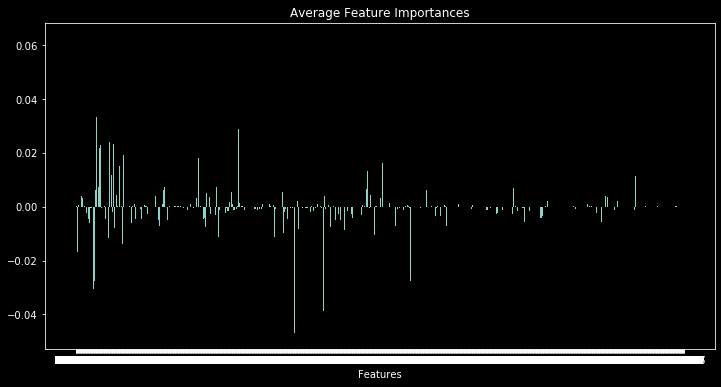

In [39]:
# Helper method to print importances and visualize distribution
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('dark_background')

def visualize_importances(feature_names, importances, title="Average Feature Importances", plot=True, axis_title="Features"):
    print(title)
    for i in range(len(feature_names)):
        print(feature_names[i], ": ", '%.3f'%(importances[i]))
    x_pos = (np.arange(len(feature_names)))
    if plot:
        plt.figure(figsize=(12,6))
        plt.bar(x_pos, importances, align='center')
        plt.xticks(x_pos, feature_names, wrap=True)
        plt.xlabel(axis_title)
        plt.title(title)
visualize_importances(feature_names, np.mean(attr, axis=0))

In [59]:
f = []
v = []
d = {}
for i in range(len(feature_names)):
    if abs(np.mean(attr, axis=0)[i]) > 0.020:
        #print(feature_names[i], ": ", '%.3f'%(np.mean(attr, axis=0)[i]))
        f.append(feature_names[i])
        v.append(np.mean(attr, axis=0)[i])
        d[feature_names[i]] = np.mean(attr, axis=0)[i]
        

In [60]:
len(d)

29

In [92]:
sorted_d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}
sorted_d

{'PF00270': -0.04728373110330848,
 'PF08242': -0.046951156905793136,
 'PF04397': -0.04226317803803337,
 'PF04851': -0.03872440840628483,
 'PF00890': -0.03355157093253758,
 'PF13561': -0.03041220065844106,
 'PF13186': -0.029560812493471336,
 'PF13723': -0.02822444091449483,
 'PF00551': -0.027719720631829852,
 'PF01842': -0.027503797586146298,
 'PF00106': -0.027193274063153472,
 'PF01195': -0.026660194629982075,
 'PF01522': -0.02587006136008979,
 'PF13165': -0.02477251583061785,
 'PF01095': -0.021359675911911964,
 'PF01553': 0.02058163571096759,
 'PF13279': 0.02181579518732501,
 'PF13620': 0.02304911256881359,
 'PF00072': 0.02311099792226795,
 'PF04026': 0.02335717178182157,
 'PF00593': 0.023436397801030684,
 'PF00891': 0.02400163782402036,
 'PF02311': 0.02756509246391988,
 'PF00037': 0.028726972973244357,
 'PF07715': 0.0324702285556711,
 'PF00109': 0.033441234710994285,
 'PF00535': 0.04649785552947337,
 'PF03176': 0.05481890692465908,
 'PF02801': 0.06289358166911385}

In [104]:
feautures_df = pd.DataFrame.from_dict(sorted_d,columns = ['importance'], orient='index').reset_index()
feautures_df.rename(columns = {'index': 'pfams'}, inplace = True)
feautures_df.to_csv('df_feature_importance.csv')

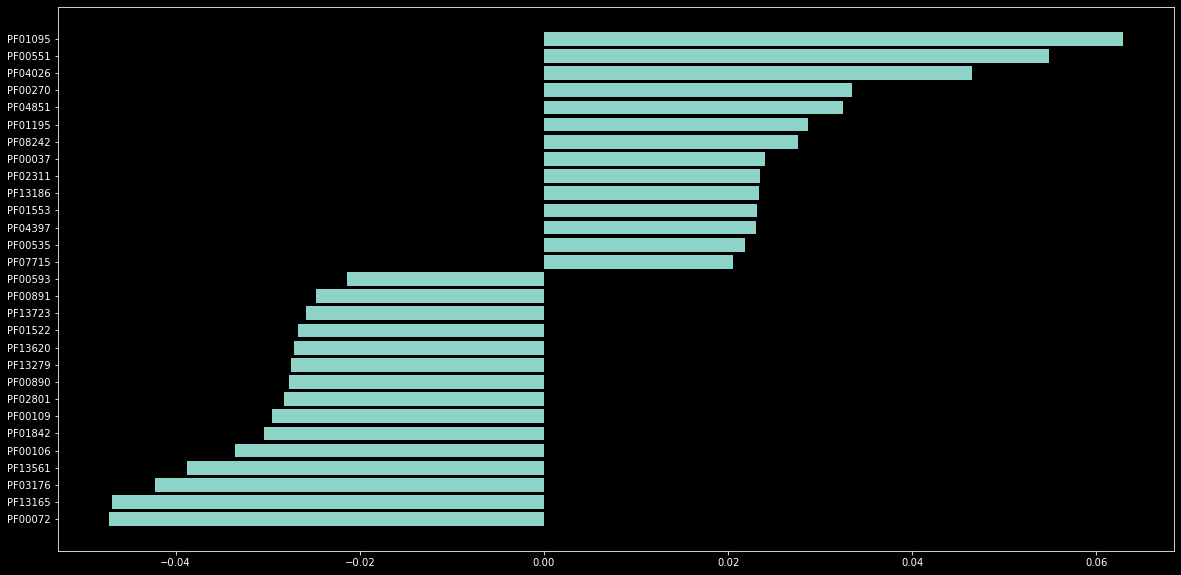

In [85]:

plt.figure(figsize=(20,10))
#plt.xticks([], d.keys(), rotation='vertical', color = 'gold')
#plt.xticks(x, labels, rotation='vertical')
#plt.bar(d.keys(), d.values(), width = 0.8, color='r')
plt.barh(list(d.keys()), sorted(list(d.values())), align='center')
plt.show()

In [83]:
sorted(list(d.keys()))

['PF00037',
 'PF00072',
 'PF00106',
 'PF00109',
 'PF00270',
 'PF00535',
 'PF00551',
 'PF00593',
 'PF00890',
 'PF00891',
 'PF01095',
 'PF01195',
 'PF01522',
 'PF01553',
 'PF01842',
 'PF02311',
 'PF02801',
 'PF03176',
 'PF04026',
 'PF04397',
 'PF04851',
 'PF07715',
 'PF08242',
 'PF13165',
 'PF13186',
 'PF13279',
 'PF13561',
 'PF13620',
 'PF13723']